In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
df= pd.read_csv("/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv")

# Exploring the Data

In [3]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [4]:
df.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [5]:
df.shape

(500, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 500 entries, 0 to 499

Data columns (total 10 columns):

 #   Column                 Non-Null Count  Dtype  

---  ------                 --------------  -----  

 0   Job_Title              500 non-null    object 

 1   Industry               500 non-null    object 

 2   Company_Size           500 non-null    object 

 3   Location               500 non-null    object 

 4   AI_Adoption_Level      500 non-null    object 

 5   Automation_Risk        500 non-null    object 

 6   Required_Skills        500 non-null    object 

 7   Salary_USD             500 non-null    float64

 8   Remote_Friendly        500 non-null    object 

 9   Job_Growth_Projection  500 non-null    object 

dtypes: float64(1), object(9)

memory usage: 39.2+ KB


In [7]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


**there are not nulll value**

In [8]:
df.isna().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
len(df.Job_Title.unique())

10

In [11]:
df[df['Job_Title'].duplicated(keep=False)]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


# Analysis and Visualization

# -Univariate Analysis

**Jop title**

In [12]:
df.head(1)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth


In [13]:
df.Job_Title.value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

In [14]:
value_counts = df['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count']

fig = px.bar(
    value_counts,
    x='Job_Title',
    y='Count',
    title='Count of Each Job Title',
    labels={'Count': 'Count', 'Job_Title': 'Job Title'},
    color='Count', 
    color_continuous_scale='Viridis'  
)

fig.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    title_x=0.5,  
    xaxis=dict(
        tickangle=-45  
    )
)

fig.show()

**Industry**

In [15]:
value_counts=df.Industry.value_counts()
value_counts

Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

In [16]:
value_counts = value_counts.reset_index()
value_counts.columns = ['Industry', 'Count']

fig = px.bar(
    value_counts,
    y='Industry',
    x='Count',
    title='Count of Each Industry',
    labels={'Count': 'Count', 'Industry': 'Industry'},
    color='Count', 
    color_continuous_scale='Plasma'  
)

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Industry',
    title_x=0.5,  # Center the title
    yaxis=dict(
        tickangle=0  
    )
)

fig.show()

* **Company_Size**

In [17]:
value_counts = df['Company_Size'].value_counts().reset_index()
value_counts

,Company_Size,count
0,Small,171
1,Large,166
2,Medium,163


In [18]:
value_counts.columns = ['Company_Size', 'Count']

fig = px.pie(
    value_counts,
    names='Company_Size',
    values='Count',
    title='Distribution of Company Sizes',
    color='Company_Size',  # Optional: color segments by company size
    color_discrete_map={'Small': 'blue', 'Medium': 'green', 'Large': 'red'}  # Customize colors
)

fig.update_layout(
    title_x=0.5 
)

fig.show()

* **Location**

In [19]:
df.Location.value_counts()

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

In [20]:
value_counts = df['Location'].value_counts().reset_index()
value_counts.columns = ['Location', 'Count']

# Create a bar chart
fig = px.bar(
    value_counts,
    x='Location',
    y='Count',
    title='Distribution of Locations',
    labels={'Count': 'Count', 'Location': 'Location'},
    color='Count',  # Optional: color bars by count for better distinction
    color_continuous_scale='Viridis'  # Optional: choose a color scale
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Count',
    title_x=0.5,  # Center the title
    xaxis=dict(
        tickangle=-45  # Rotate x-axis labels for better readability
    )
)

# Show the plot
fig.show()

* **AI_Adoption_Level**

In [21]:
value_counts=df["AI_Adoption_Level"].value_counts()
value_counts

AI_Adoption_Level
Medium    179
Low       174
High      147
Name: count, dtype: int64

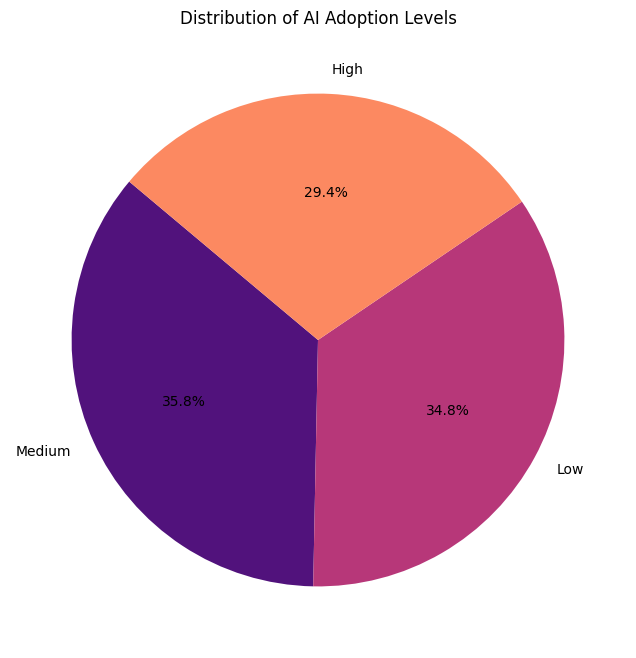

In [22]:
colors = sns.color_palette('magma', len(value_counts))
plt.figure(figsize=(8, 8))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=140  
)
plt.title('Distribution of AI Adoption Levels')
plt.show()

* **Automation_Risk**

In [23]:
df.Automation_Risk.value_counts()

Automation_Risk
Medium    173
High      169
Low       158
Name: count, dtype: int64

In [24]:
value_counts = df['Required_Skills'].value_counts().reset_index()
value_counts

,Required_Skills,count
0,Project Management,60
1,Python,60
2,Cybersecurity,58
3,Machine Learning,52
4,UX/UI Design,49
5,Sales,49
6,Data Analysis,49
7,Marketing,45
8,JavaScript,44
9,Communication,34


In [25]:
value_counts.columns = ['Required_Skills', 'Count']
fig = px.pie(
    value_counts,
    names='Required_Skills',
    values='Count',
    title='Distribution of Required Skills',
    color_discrete_sequence=px.colors.sequential.Plasma 
)
fig.update_layout(
    title_x=0.5 
)
fig.show()

* **Salary_USD**

In [26]:
df.Salary_USD.min()

31969.52634612842

In [27]:
df.Salary_USD.max()

155209.82161382848

In [28]:
df.Salary_USD.mean()

91222.39097411344

In [29]:
df["Salary_USD"].value_counts()

Salary_USD
111392.165243    1
116713.117943    1
104854.999236    1
139078.066919    1
97811.878124     1
                ..
100575.362116    1
98153.125072     1
98036.517081     1
88155.315907     1
68764.378921     1
Name: count, Length: 500, dtype: int64

**there are outliers **

In [30]:
fig = px.box(
    df,
    x='Salary_USD',
    title='Boxplot of Salary (USD)',
    color_discrete_sequence=['skyblue']  
)

fig.show()

In [31]:
fig = px.histogram(df, x='Salary_USD', nbins=20, title='Histogram of Salary [USD]', color_discrete_sequence=['purple '])
fig.update_xaxes(title_text='Salary (USD)')
fig.update_yaxes(title_text='Count')
fig.show()

* **Remote_Friendly**

In [32]:
df["Remote_Friendly"].value_counts()

Remote_Friendly
Yes    251
No     249
Name: count, dtype: int64

In [33]:
value_counts = df['Remote_Friendly'].value_counts().reset_index()
value_counts.columns = ['Remote_Friendly', 'Count']
fig = px.pie(
    value_counts, 
    names='Remote_Friendly', 
    values='Count', 
    title='Distribution of Remote Friendly Jobs',
    
)

fig.show()

In [34]:
df.Job_Growth_Projection.value_counts()

Job_Growth_Projection
Growth     169
Decline    169
Stable     162
Name: count, dtype: int64